In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#reading data from CSV file to a Pandas DataFrame
df = pd.read_csv("/content/diabetes.csv")

#To Know total number of rows, columns (name, datatypes and null values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset has 9 columns and 768 records(rows).

1- Pregnancies: Number of Pregnencies

2- Glucose: Level of Glucose in blood (not mentioned if FBS or not). **Cannot be 0**.

3- BloodPressure: Reading of BP measures of patients. **Cannot be 0**.

4- SkinThickness: Thickness of Adipose Tissue around the abdomen which can be a factor for Diabetes. **Cannot be 0**.

5- Insulin: Reading for each patient and it **cannot be 0**

6- BMI: Body Mass Index of patients. **Cannot be 0**.

7- DiabetesPedigreeFunction: Patient's DiabetesPedigreeFunction score.

8- Age: Age of the patients

9- Outcome: 1 - Yes (Diabetic) and 0 - No (Non Diabetic)

**There are no null entries.**

**But, we need to check if there are zeros in the columns like Glucose, Blood Pressure, Skin Thickness and BMI as these values cannot be zeros for alive patients.**

In [2]:
df.head()
#ensured no Duplicates
#df[df.duplicated()].shape

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.describe()


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

C**olumns Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI and Outcome has 0 as Min Value.**

**Columns Pregnancies and Outcome can have 0 values.**


In [4]:
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

There are ample zero values and need to have a strategy to impute them.

Check the outliers before imputation as mean imputation will have the effect of outliers.

Removing the outliers and then performing mean imputation might result in biased values. Hence perform mean imputation and then remove the outliers.

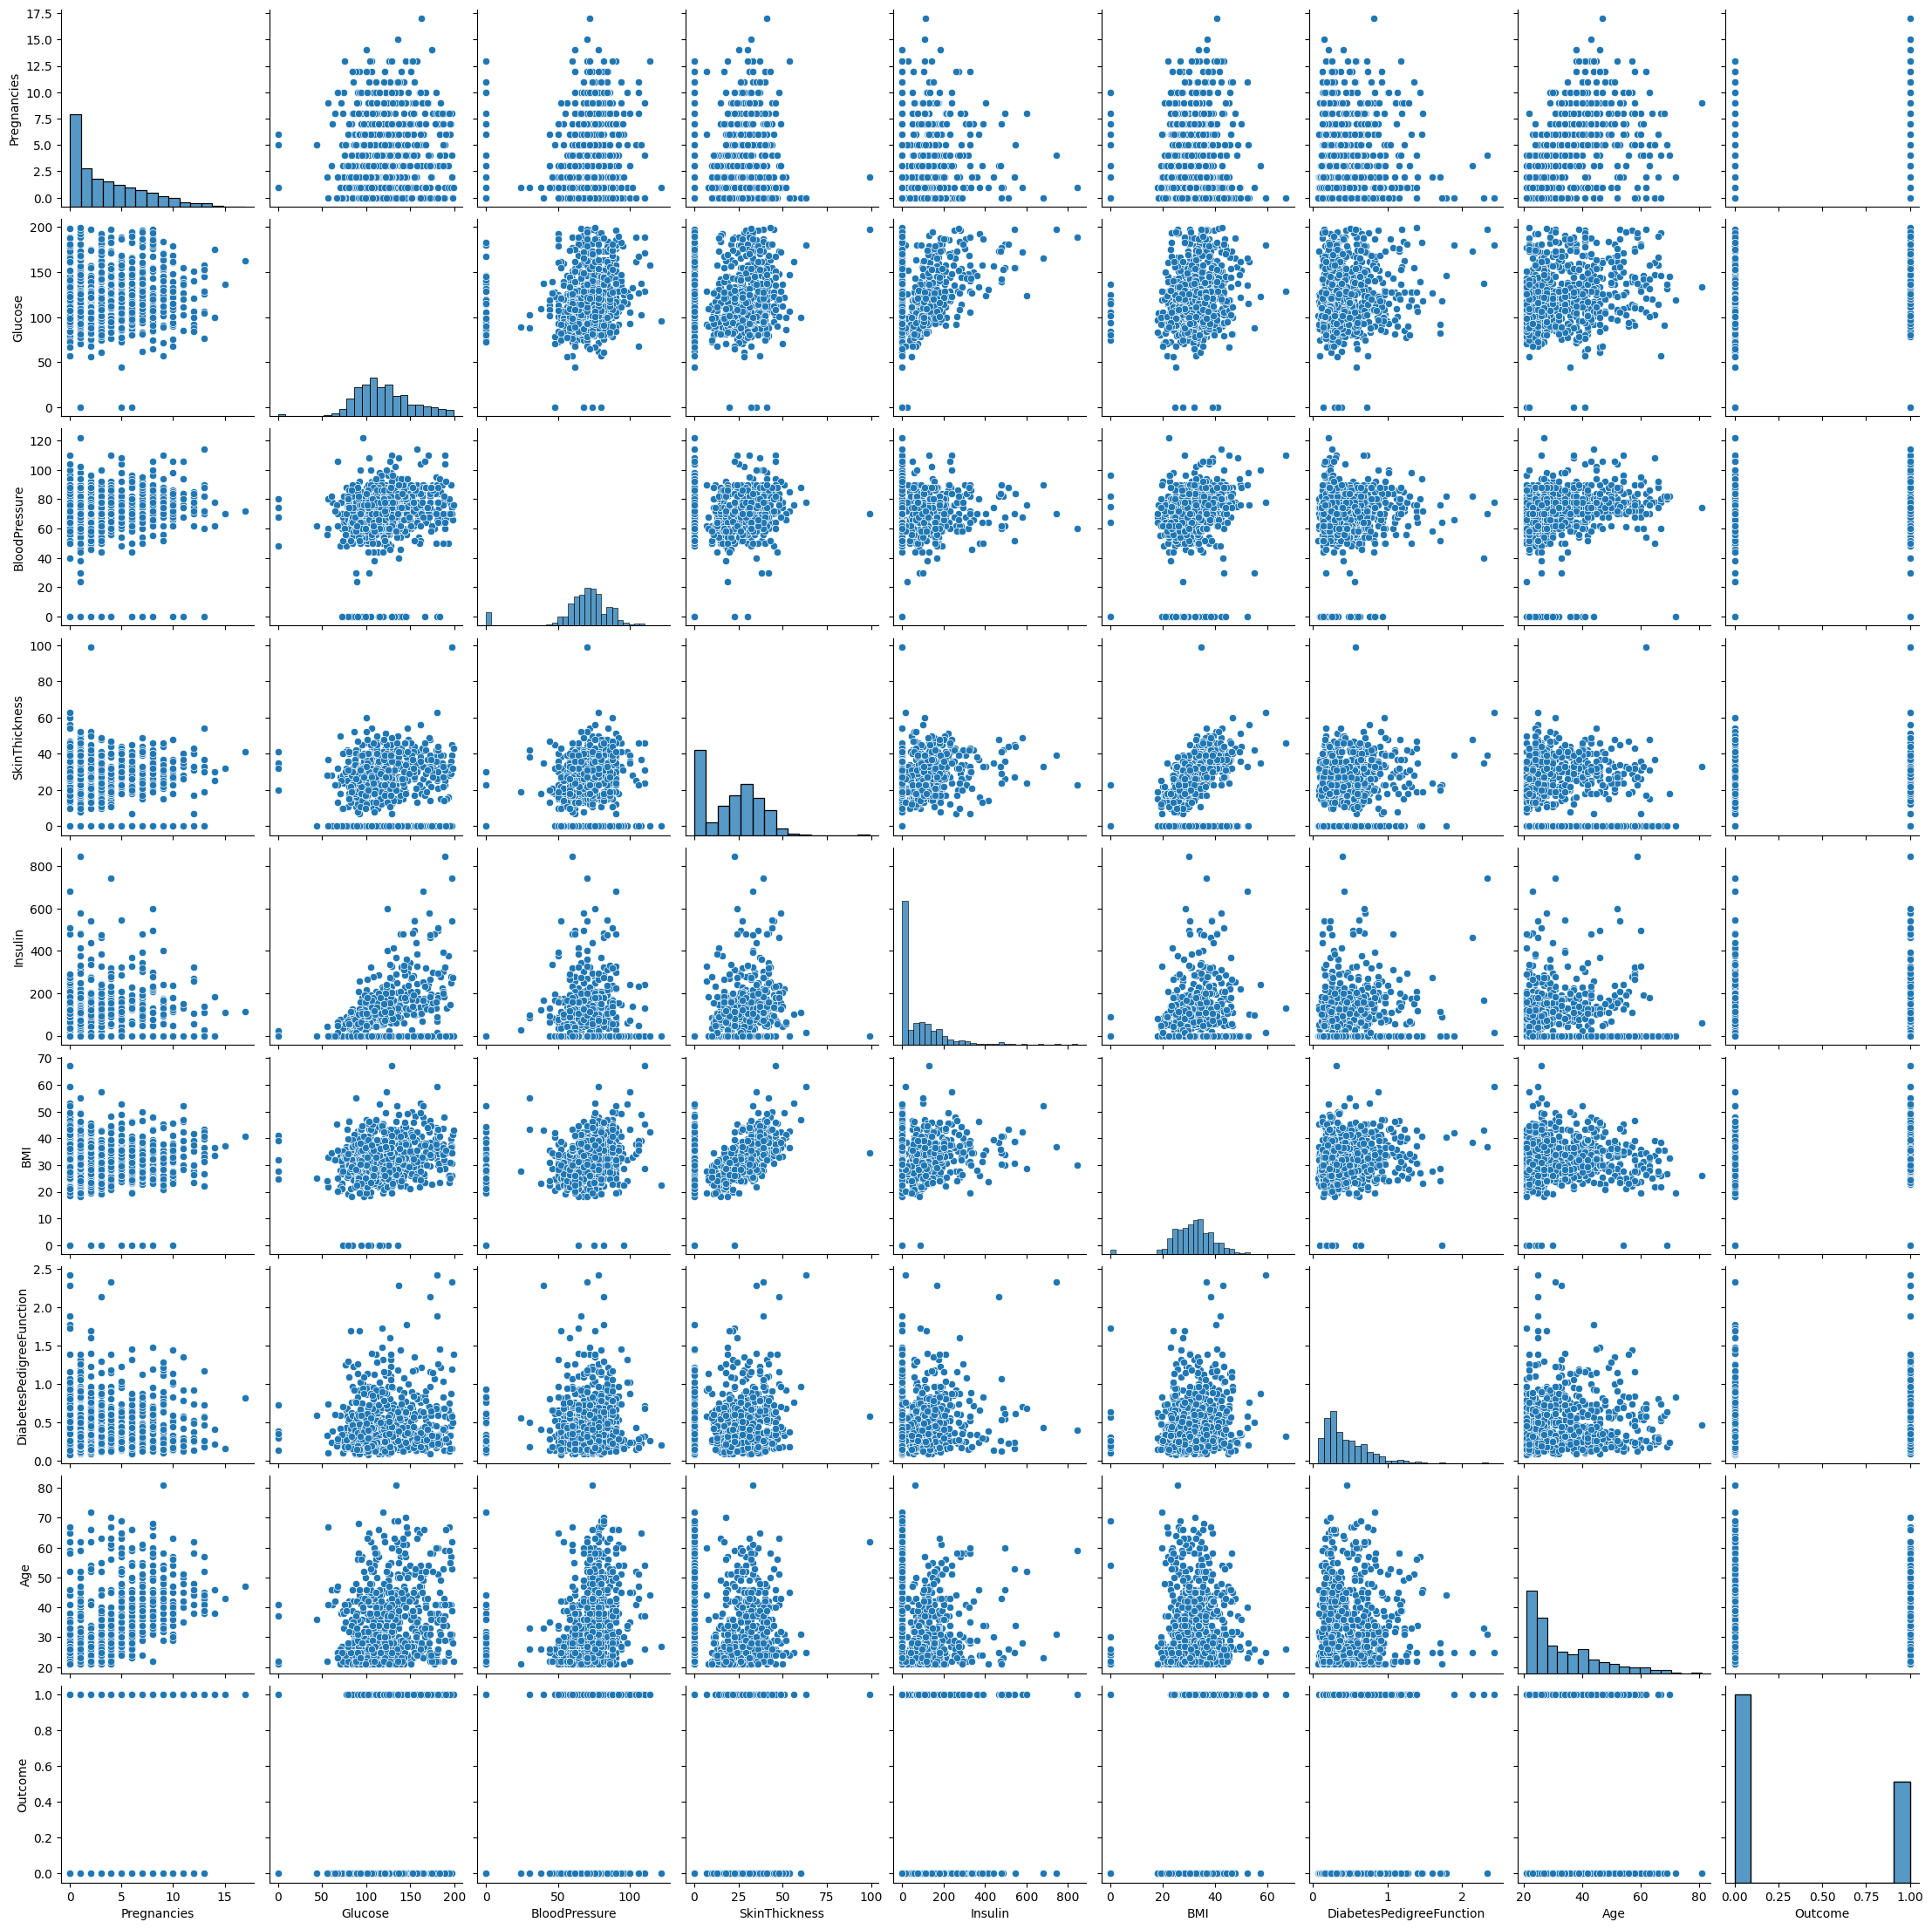

In [5]:
#Let see the Histogram and scatter plot via Pairplot for the initial glance
sns.pairplot(df)
plt.show()


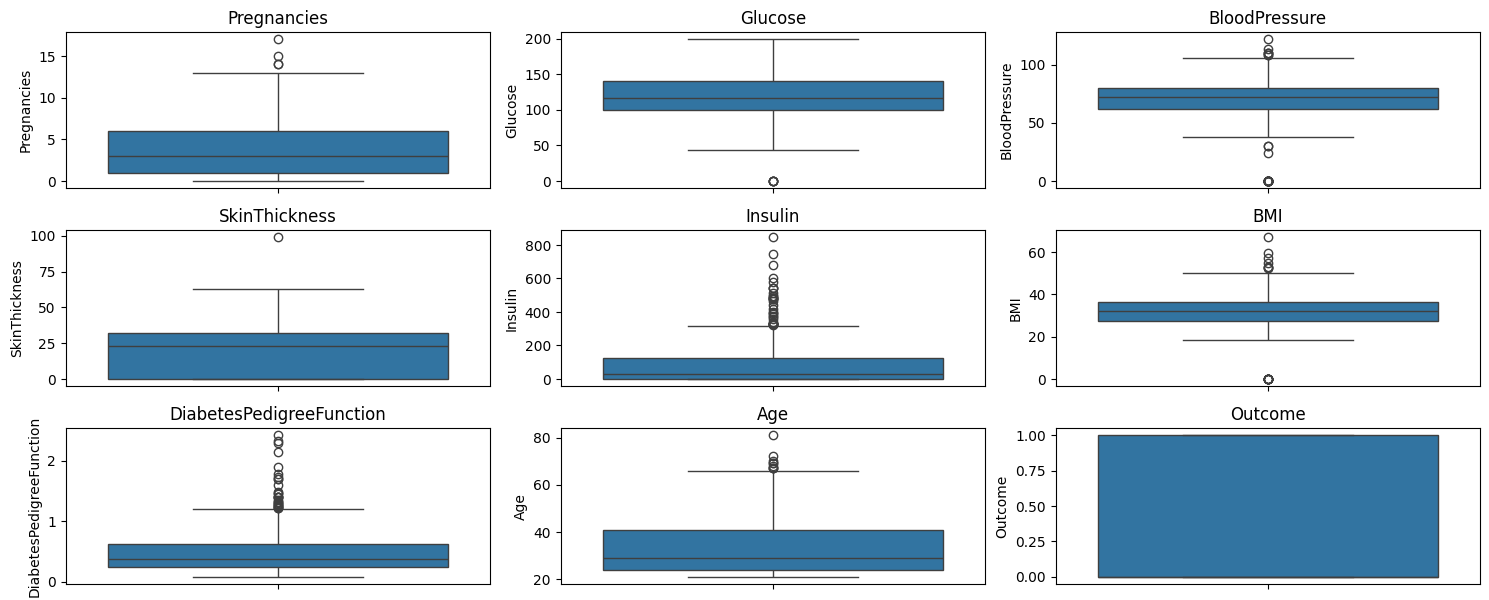

In [6]:
#Checking Outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


Lets impute the zeros among the values of columns other than Pregnancies and Outcome columns.

Age and DiabetesPedigreeFunction column does not have any zero values.

In [7]:
#working with imputation without altering the original dataframe
df_zero_imputed = df.copy()

#Mean Imputation to zero values
Glucose_Mean = df_zero_imputed['Glucose'].mean()
BloodPressure_Mean = df_zero_imputed['BloodPressure'].mean()
SkinThickness_Mean = df_zero_imputed['SkinThickness'].mean()
Insulin_Mean = df_zero_imputed['Insulin'].mean()
BMI_Mean = df_zero_imputed['BMI'].mean()

df_zero_imputed.loc[:, 'Glucose'] = df_zero_imputed['Glucose'].replace(0,Glucose_Mean)
df_zero_imputed.loc[:, 'BloodPressure'] = df_zero_imputed['BloodPressure'].replace(0,BloodPressure_Mean)
df_zero_imputed.loc[:, 'SkinThickness'] = df_zero_imputed['SkinThickness'].replace(0,SkinThickness_Mean)
df_zero_imputed.loc[:, 'Insulin'] = df_zero_imputed['Insulin'].replace(0,Insulin_Mean)
df_zero_imputed.loc[:, 'BMI'] = df_zero_imputed['BMI'].replace(0,BMI_Mean)

In [8]:
(df_zero_imputed==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
df_zero_imputed.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      26.606479  118.660163   
std       3.369578   30.436016      12.115932       9.631241   93.080358   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      20.536458   79.799479   
50%       3.000000  117.000000      72.000000      23.000000   79.799479   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

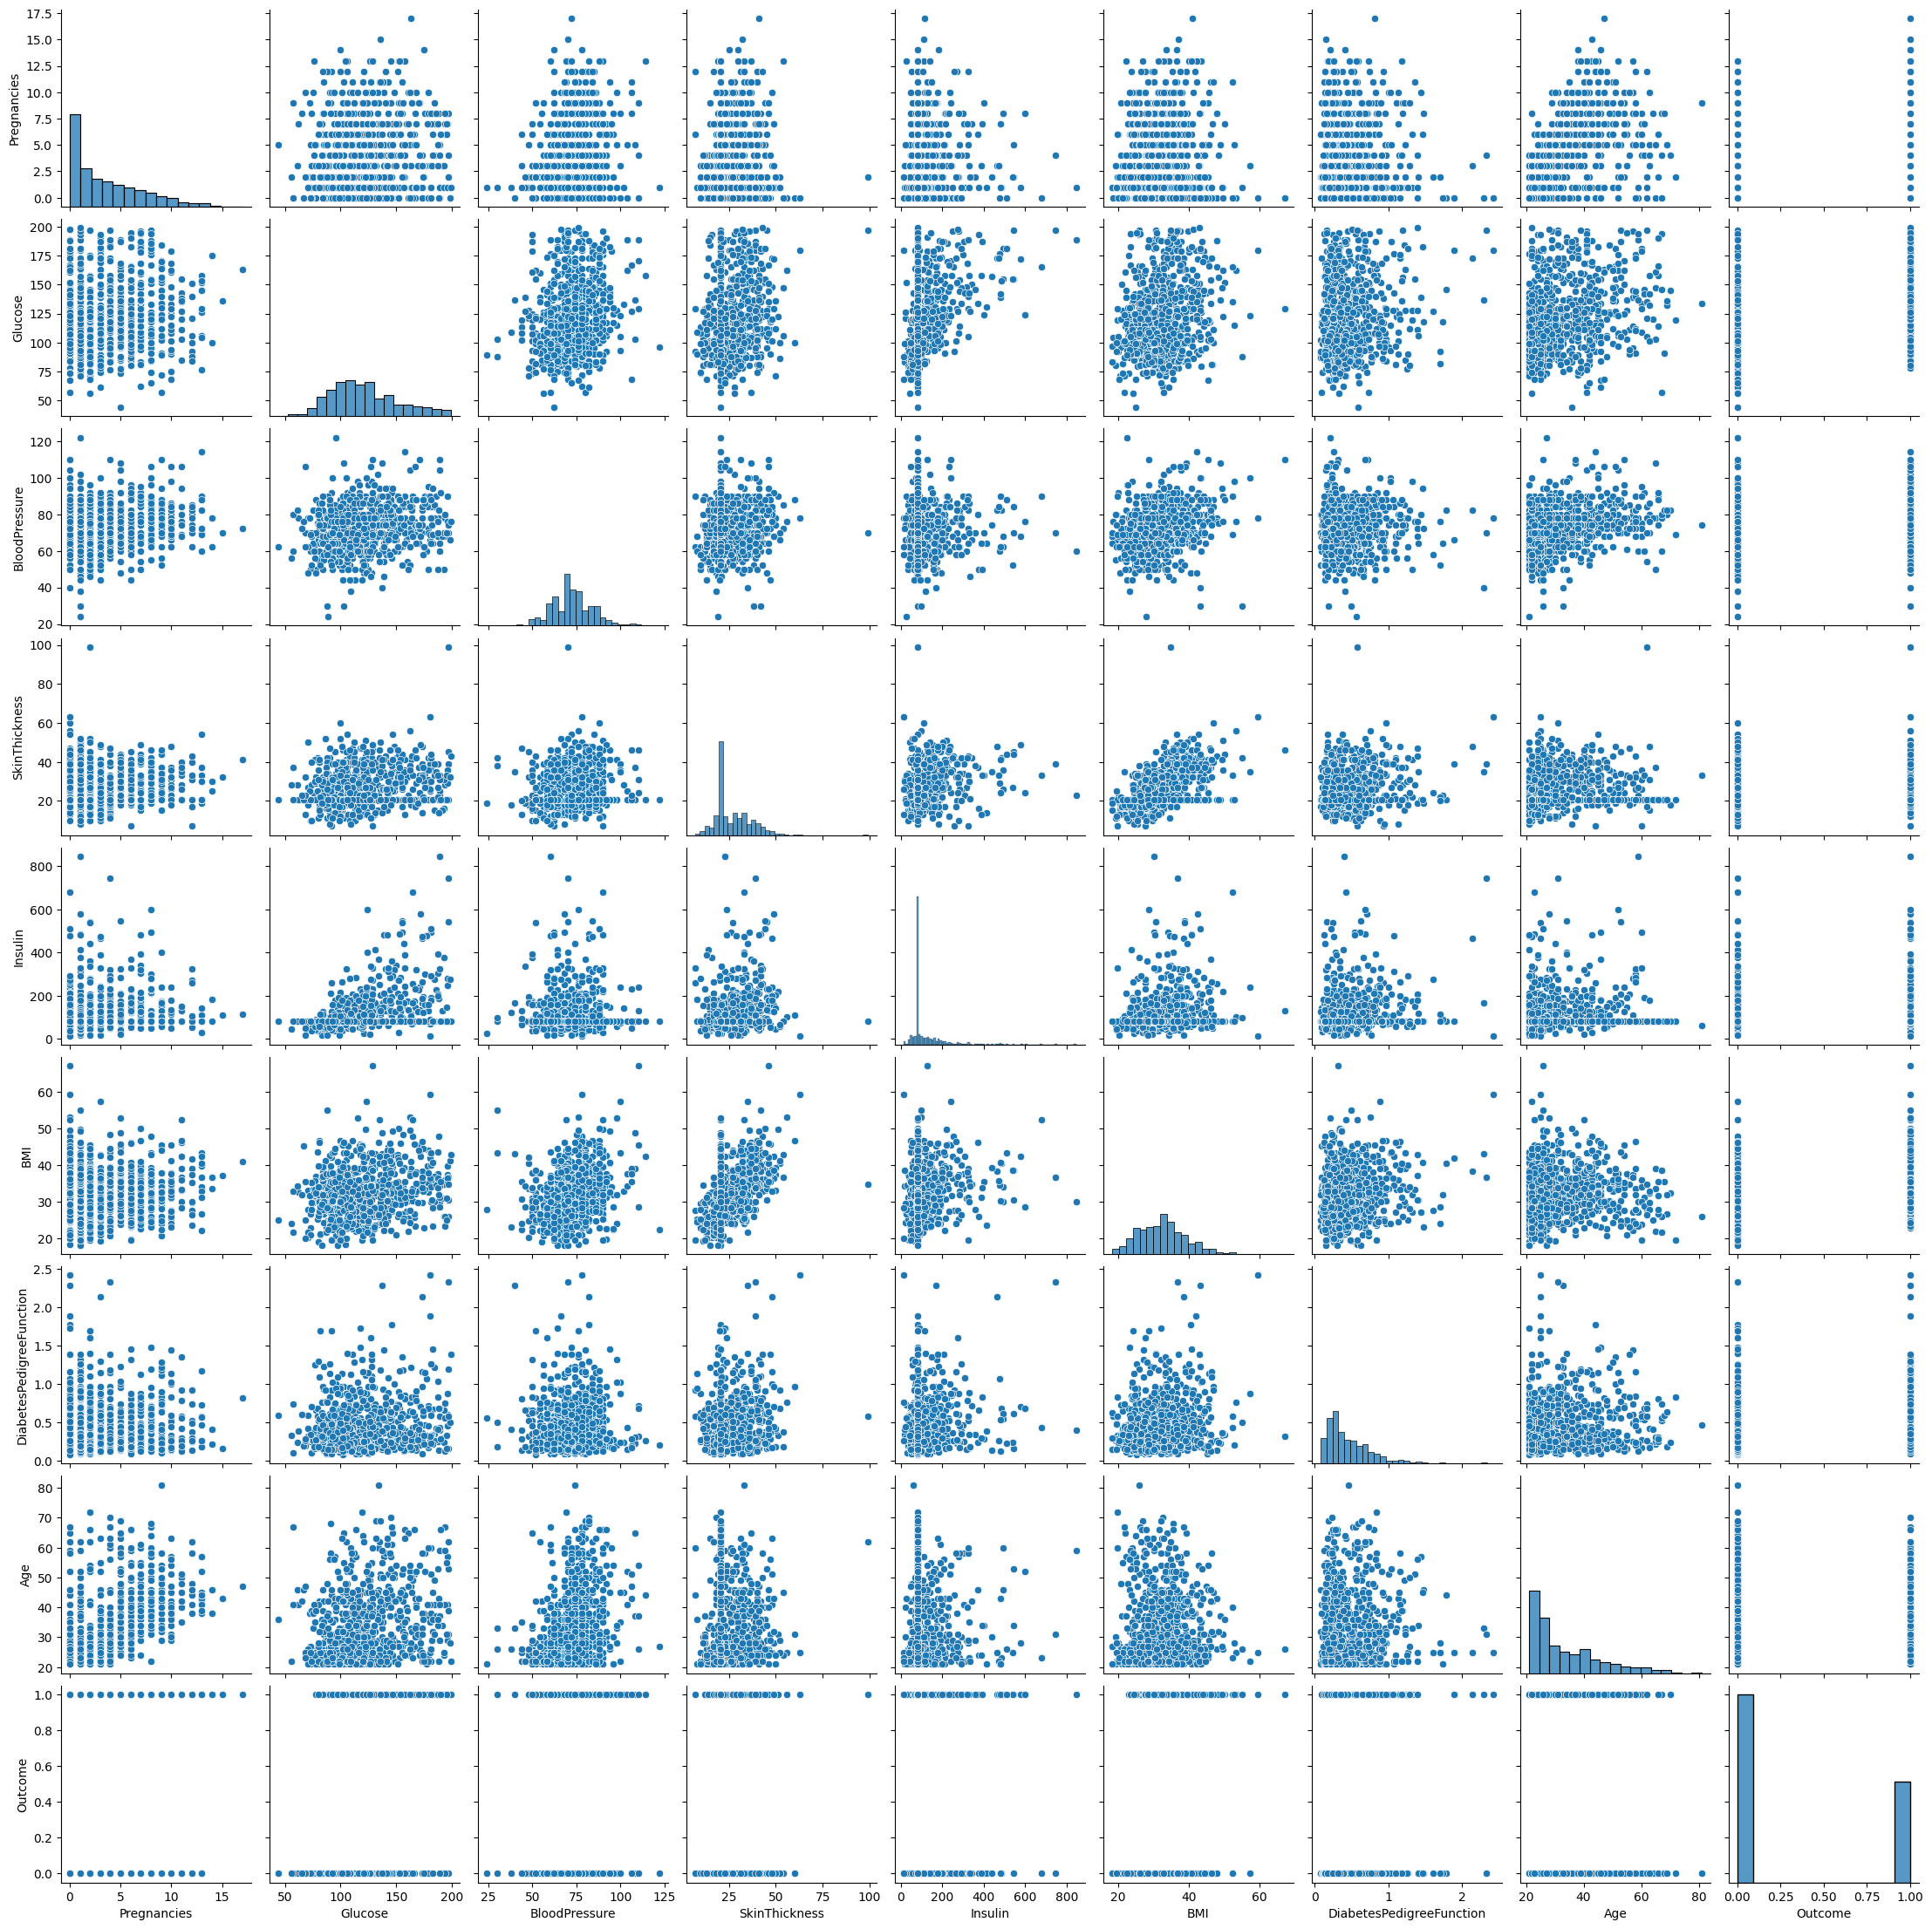

In [9]:
#Let see the Histogram and scatter plot via Pairplot for the initial glance
sns.pairplot(df_zero_imputed)
plt.show()


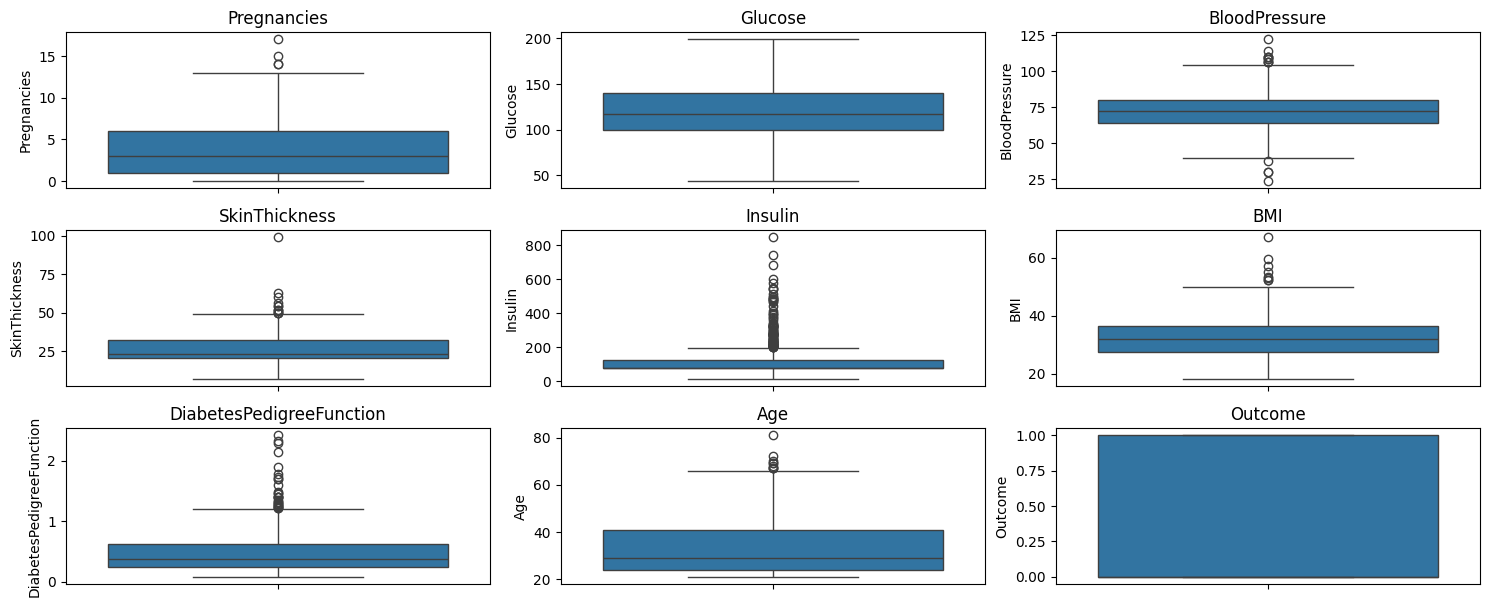

In [10]:
#Checking Outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_zero_imputed, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df_zero_imputed[column])
    plt.title(column)
plt.tight_layout()
plt.show()


**As you can see from the box plot, on mean imputation to the the Zeros, Glucose Column has come out without any outliers.**

In [10]:
#Removing Outliers
Outlier_Columns=['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']

#Working with the mean imputed version of data without affecting the mean imputed dataframe
df_imputed_cleaned = df_zero_imputed.copy()

for c in Outlier_Columns:
  Q1 = df_imputed_cleaned[c].quantile(0.25)
  Q3 = df_imputed_cleaned[c].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  # Filter outliers using the interquartile range (IQR) method
  df_imputed_cleaned = df_imputed_cleaned[(df_imputed_cleaned[c] >= lower_bound) & (df_imputed_cleaned[c] <= upper_bound)]
  print('\nTotal Records after removal of outlier from ',c,' is ',df_imputed_cleaned.shape)



Total Records after removal of outlier from  Pregnancies  is  (764, 9)

Total Records after removal of outlier from  BloodPressure  is  (750, 9)

Total Records after removal of outlier from  SkinThickness  is  (738, 9)

Total Records after removal of outlier from  Insulin  is  (653, 9)

Total Records after removal of outlier from  BMI  is  (647, 9)

Total Records after removal of outlier from  DiabetesPedigreeFunction  is  (618, 9)

Total Records after removal of outlier from  Age  is  (603, 9)


In [11]:
df_imputed_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               603 non-null    int64  
 1   Glucose                   603 non-null    float64
 2   BloodPressure             603 non-null    float64
 3   SkinThickness             603 non-null    float64
 4   Insulin                   603 non-null    float64
 5   BMI                       603 non-null    float64
 6   DiabetesPedigreeFunction  603 non-null    float64
 7   Age                       603 non-null    int64  
 8   Outcome                   603 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 47.1 KB


In [12]:
df_imputed_cleaned.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   603.000000  603.000000     603.000000     603.000000  603.000000   
mean      3.767828  116.284366      71.403782      25.230229   91.543329   
std       3.223021   27.576894      10.872879       8.198392   33.903897   
min       0.000000   44.000000      44.000000       8.000000   15.000000   
25%       1.000000   97.000000      64.000000      20.536458   79.799479   
50%       3.000000  112.000000      70.000000      20.536458   79.799479   
75%       6.000000  130.500000      78.000000      31.000000   94.000000   
max      13.000000  196.000000     104.000000      49.000000  196.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  603.000000                603.000000  603.000000  603.000000  
mean    31.445826                  0.410101   32.112769    0.301824  
std      6.104389                  0.235116   10.543088    0.459431  
min     18.200000                  0.078000   21.000000    0.000000  
25%     26.950000                  0.235500   24.000000    0.000000  
50%     31.600000                  0.340000   28.000000    0.000000  
75%     35.300000                  0.559500   39.000000    1.000000  
max     47.900000                  1.138000   64.000000    1.000000

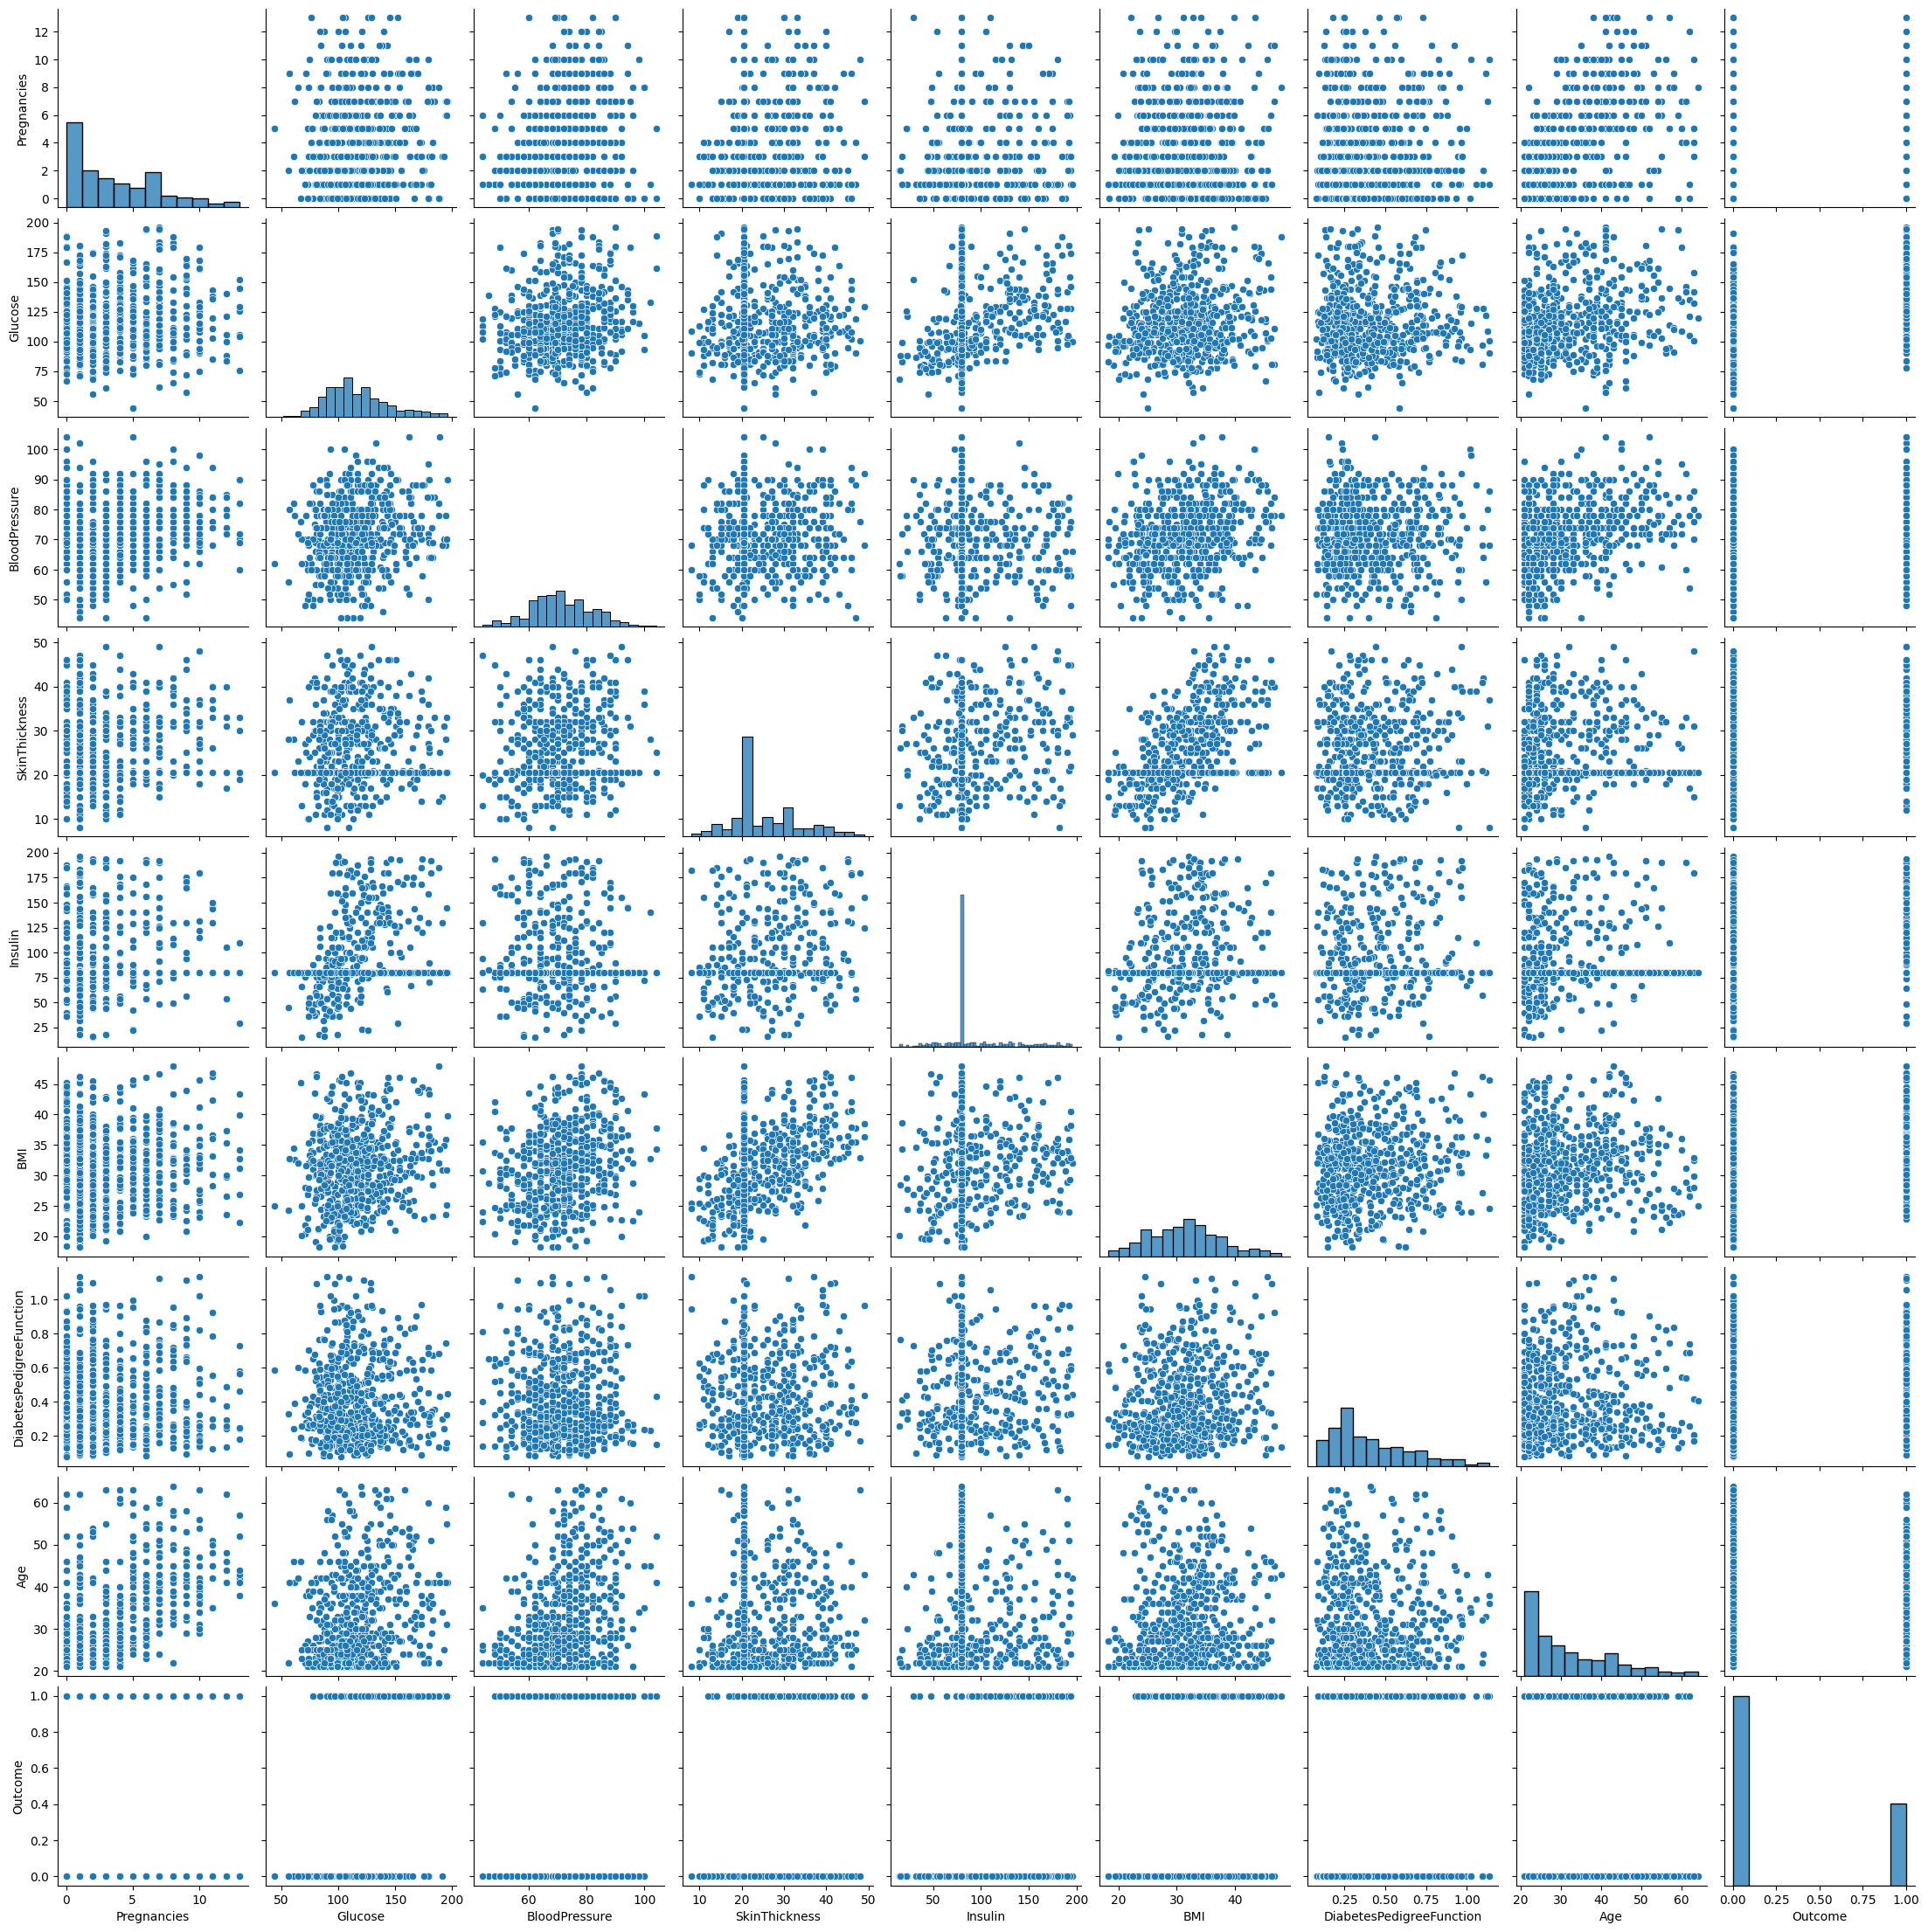

In [19]:
#Let see the Histogram and scatter plot via Pairplot for the initial glance
sns.pairplot(df_imputed_cleaned)
plt.show()


In [35]:
#Checking the correlation
corr_matrix = df_imputed_cleaned.corr()
corr_matrix

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.136684       0.201915       0.076058   
Glucose                      0.136684  1.000000       0.220322       0.044781   
BloodPressure                0.201915  0.220322       1.000000       0.102698   
SkinThickness                0.076058  0.044781       0.102698       1.000000   
Insulin                     -0.011976  0.298678      -0.022916       0.242428   
BMI                          0.058991  0.159221       0.242533       0.491161   
DiabetesPedigreeFunction    -0.011247  0.024751      -0.001664       0.102499   
Age                          0.578051  0.266410       0.359889       0.060423   
Outcome                      0.215675  0.486425       0.165634       0.119253   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.011976  0.058991                 -0.011247   
Glucose                   0.298678  0.159221                  0.024751   
BloodPressure            -0.022916  0.242533                 -0.001664   
SkinThickness             0.242428  0.491161                  0.102499   
Insulin                   1.000000  0.145169                  0.143683   
BMI                       0.145169  1.000000                  0.133976   
DiabetesPedigreeFunction  0.143683  0.133976                  1.000000   
Age                       0.067845  0.089152                  0.012604   
Outcome                   0.160589  0.272603                  0.152375   

                               Age   Outcome  
Pregnancies               0.578051  0.215675  
Glucose                   0.266410  0.486425  
BloodPressure             0.359889  0.165634  
SkinThickness             0.060423  0.119253  
Insulin                   0.067845  0.160589  
BMI                       0.089152  0.272603  
DiabetesPedigreeFunction  0.012604  0.152375  
Age                       1.000000  0.261139  
Outcome                   0.261139  1.000000

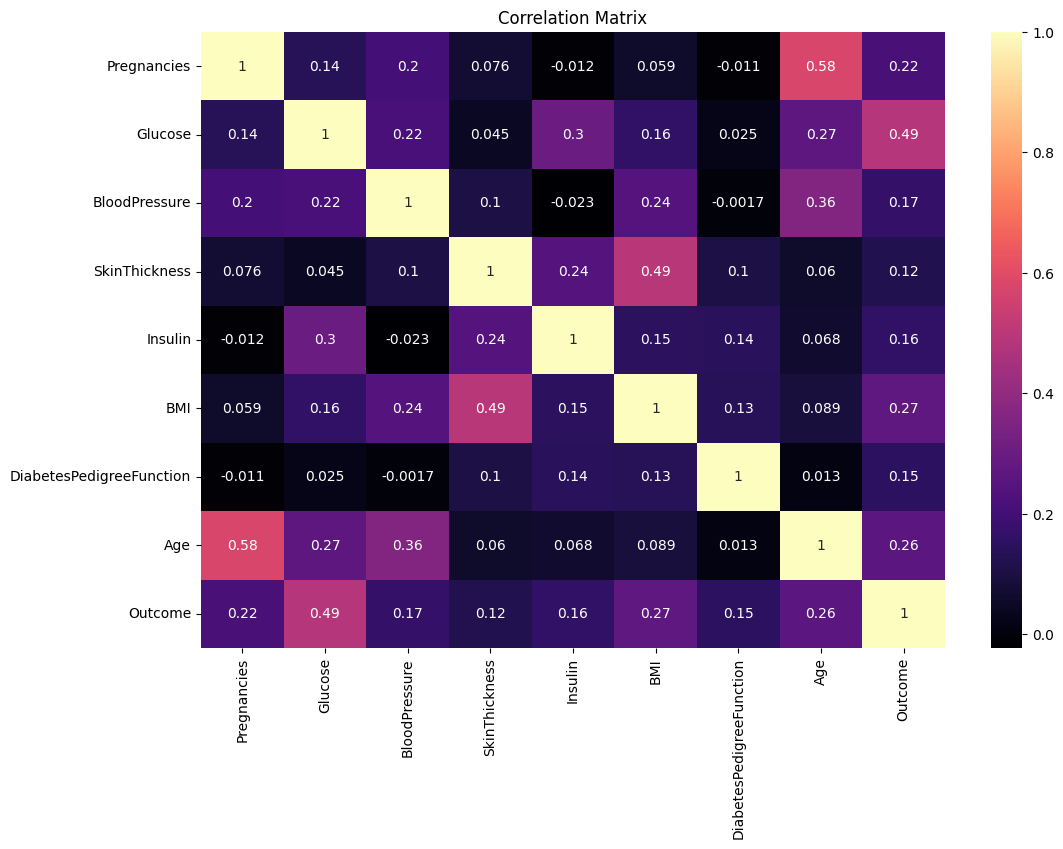

In [36]:
#HeatMap of Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

From the Correlation, we have below pairs that has strong correlation which can be taken forward

Pregnancies and Age - 0.58

Glucose and Outcome - 0.49

SkinThickness and BMI - 0.49

# Summary

The Diabetese dataset shared had readings of Female Patients from age 21 to 80 with minimum pregnancy 0 and max pregnancies as 17.

The dataset had other attributes that could attribute to their Diabetes.

Throug EDA we had to find out which all attributes are having a correlation and use them for prediction.

There were outliers and zero values. It was confusing to decide wheather to remove the outliers before mean imputing or not. Referred and found that it might induce bias to the data and hence moved on with mean imputing with outliers and then removing the outliers.

From the Correlation Matrix we found the attributes Pregnancie, Age, Glucose, BMI and SkinThickness are comparitively strongly correlated (though thier correlation score falls in moderate category of correlation defenition).